In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('delivery_time.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
"""Correlation"""

df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


C:\Users\sampa\AppData\Local\Temp\ipykernel_19244\228275473.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121)


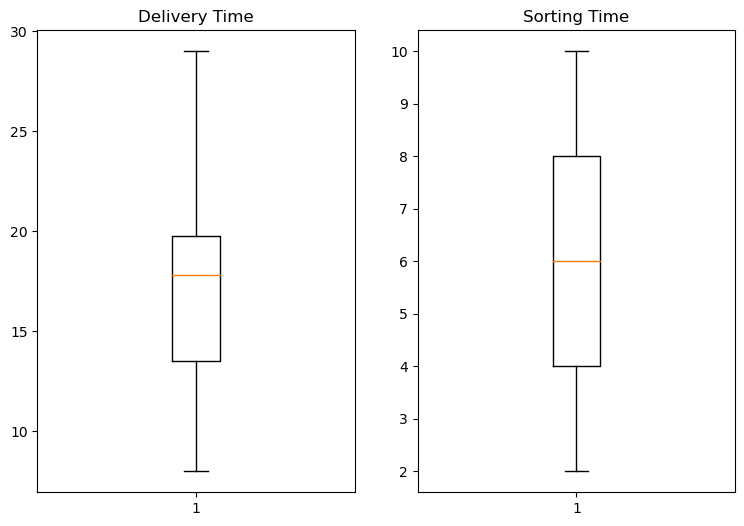

In [9]:
# Plotting the data to check for outliers using boxplot

import matplotlib.pyplot as plt

plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery_Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

### There are no Outliers

In [12]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time", data = df).fit()

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

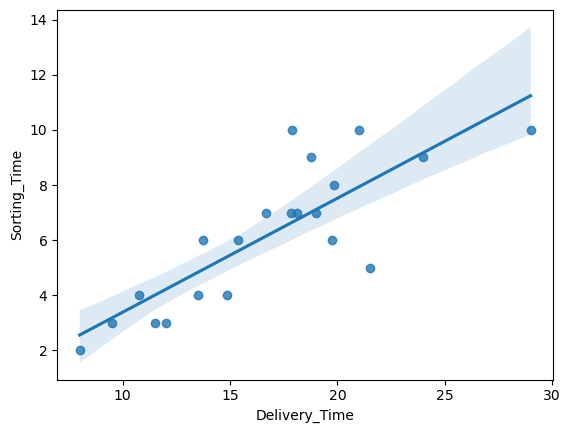

In [13]:
import seaborn as sns

sns.regplot(x='Delivery_Time', y='Sorting_Time',data = df)


In [9]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [10]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

# R squared values
(model.rsquared, model.rsquared_adj)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


(0.6822714748417231, 0.6655489208860244)

### The r2-score is less than 0.8 Lets try with some transformation and check whether we can obtain higer r2_score

In [14]:
# Square Root Transformation.

square_root_model = smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Thu, 28 Dec 2023   Prob (F-statistic):           8.48e-07
Time:                            12:21:18   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can see that the r2-score has imporved to 0.72

In [16]:
# CubeRoot Transformation.

cube_root_model = smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Thu, 28 Dec 2023   Prob (F-statistic):           4.90e-07
Time:                            12:22:47   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can see that the r2-score has imporved to 0.74 which is slightly higher than sqrt model/

In [18]:
# Log Model

log_model = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 28 Dec 2023   Prob (F-statistic):           1.60e-07
Time:                           12:23:55   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### the log model has given good r2_score, hence we can proceed with this model.

## Residual Analysis

### Test for Normality of Residuals(Q-Q plot)

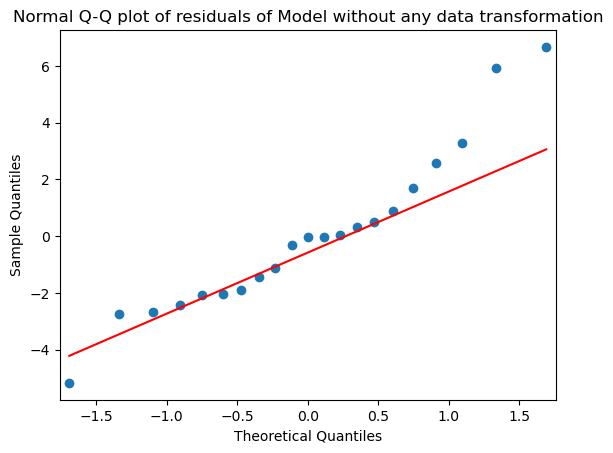

In [20]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

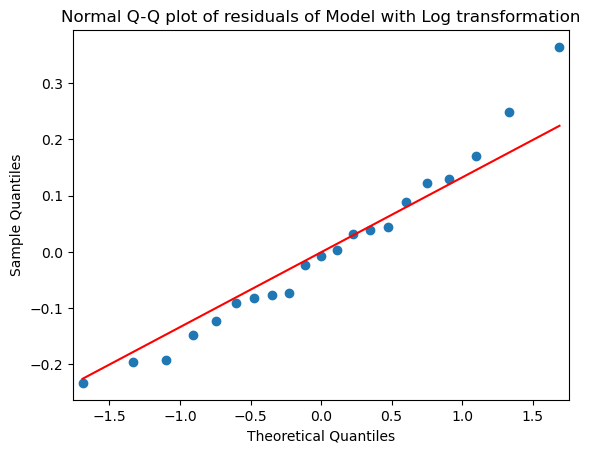

In [21]:
sm.qqplot(log_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

## The log_model has better fit than regular data, Also the r2_score is better, hence we can finalize the Log_model.

## Model Validation

### Comparing the RMSE of model and log_model

In [23]:
from sklearn.metrics import mean_squared_error

In [26]:
log_model_pred_y =np.exp(log_model.predict(df['Sorting_Time']))

In [27]:
log__rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'log_model=',log__rmse)

model= 2.9349037688901394 
log_model= 2.7458288976145497


### log_model has lower RMSE, again upholding our above inference.

### The log_model has and average Error of (+/-) 2.74 

## Predicting values from Model with Log Transformation on the Data

In [22]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df.Sorting_Time
predicted['Delivery_Time'] = df.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(log_model.predict(predicted.Sorting_Time))) # Inverse of log is exp to get the actual values
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
